In [2]:
from transformers import pipeline
import os
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from tensorflow.keras import layers, losses
from tensorflow.keras.optimizers import Adam
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from enum import Enum
import PIL
import PIL.Image
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping 
from PIL import Image
import matplotlib.patches as patches
import random
print("cwd", os.getcwd())

classifier = pipeline(model="facebook/detr-resnet-50")


cwd /home/linus/WashUCoding/DIS Copenhagen/Neural Networks/TomJerryProject/src


Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Could not find image processor class in the image processor config or the model conf

['frame3469.jpg', 'frame4900.jpg', 'frame812.jpg', 'frame4606.jpg', 'frame244.jpg', 'frame2045.jpg', 'frame419.jpg', 'frame5017.jpg', 'frame4084.jpg', 'frame4461.jpg', 'frame175.jpg', 'frame3656.jpg', 'frame160.jpg', 'frame2607.jpg', 'frame4860.jpg', 'frame4727.jpg', 'frame4439.jpg', 'frame1676.jpg', 'frame3851.jpg', 'frame4459.jpg', 'frame4614.jpg', 'frame5175.jpg', 'frame1838.jpg', 'frame4091.jpg', 'frame4145.jpg', 'frame2624.jpg', 'frame2980.jpg', 'frame4142.jpg', 'frame4919.jpg', 'frame4758.jpg', 'frame4095.jpg', 'frame1824.jpg', 'frame1963.jpg', 'frame3568.jpg', 'frame715.jpg', 'frame5452.jpg', 'frame283.jpg', 'frame3759.jpg', 'frame3718.jpg', 'frame2248.jpg', 'frame970.jpg', 'frame111.jpg', 'frame3372.jpg', 'frame2165.jpg', 'frame309.jpg', 'frame810.jpg', 'frame4744.jpg', 'frame4721.jpg', 'frame2422.jpg', 'frame1345.jpg', 'frame547.jpg', 'frame1837.jpg', 'frame3417.jpg', 'frame1397.jpg', 'frame4435.jpg', 'frame2666.jpg', 'frame2327.jpg', 'frame4757.jpg', 'frame1924.jpg', 'frame48

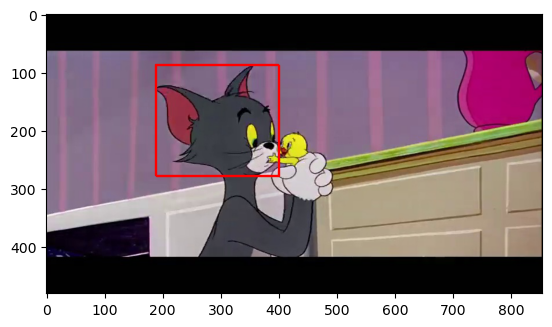

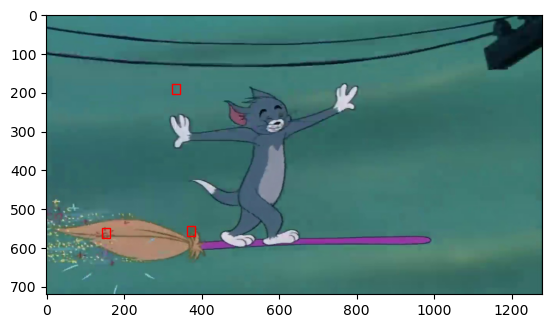

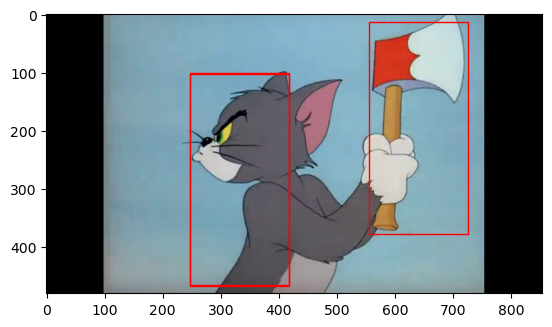

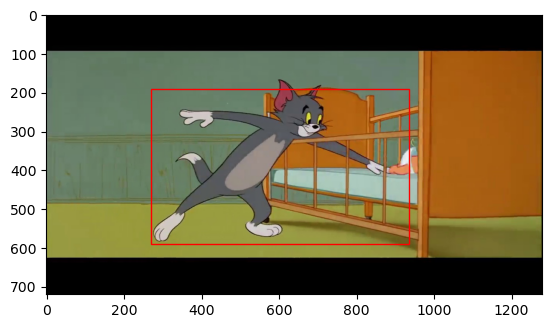

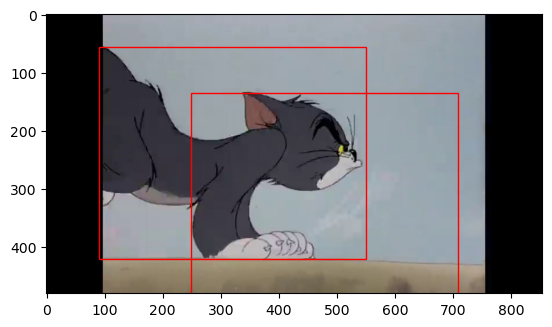

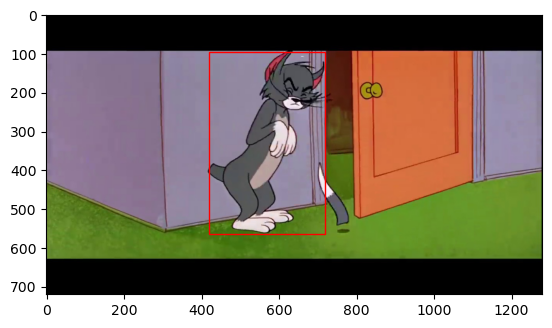

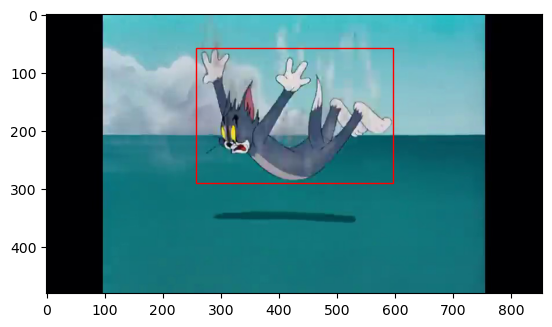

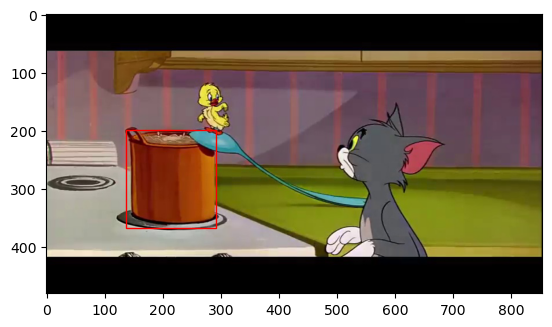

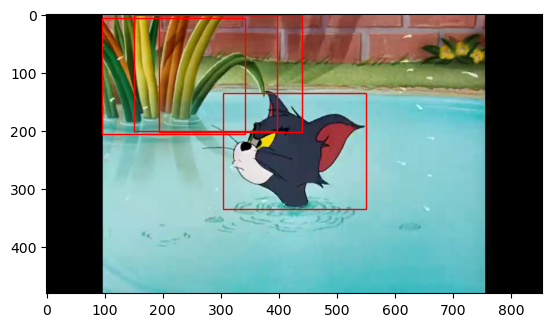

In [12]:
base_path = "../archive/tom_and_jerry/tom_and_jerry/tom/"
pictures = os.listdir("../archive/tom_and_jerry/tom_and_jerry/tom/")
print(pictures)

for i in range(10): 
    currFrame = pictures[i]
    path_to_image = f"../archive/tom_and_jerry/tom_and_jerry/tom/{currFrame}"

    im = Image.open(path_to_image)

    res = classifier(im, threshold=0.6)

    print(res)

    croppedImages = []

    if res: 
        boxes = []
        for i in range(len(res)): 
            print(res[i]["box"])
            boxCoords = res[i]["box"]["xmin"], res[i]["box"]["ymin"], res[i]["box"]["xmax"], res[i]["box"]["ymax"]
            boxes.append(boxCoords)
        print("All coords:", boxes)

        fig, axis = plt.subplots()

        axis.imshow(im)

        # draw the box
        for i in range(len(boxes)): 
            xmin, ymin, xmax, ymax = boxes[i]
            width, height = boxCoords[2]-boxCoords[0], boxCoords[3]-boxCoords[1]
            rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor="r", facecolor="none", label="test")

            axis.add_patch(rect)
            axis.set_label("test")


In [10]:
from PIL import Image

def expand2square(pil_img, background_color):
    width, height = pil_img.size
    if width == height:
        return pil_img
    elif width > height:
        result = Image.new(pil_img.mode, (width, width), background_color)
        result.paste(pil_img, (0, (width - height) // 2))
        return result
        # return "none"
    else:
        result = Image.new(pil_img.mode, (height, height), background_color)
        result.paste(pil_img, ((height - width) // 2, 0))
        # return result
        return "none"

base_path = "../archive/tom_and_jerry/tom_and_jerry/tom/"
pictures = os.listdir("../archive/tom_and_jerry/tom_and_jerry/tom/")
print(pictures)

for i in range(10): 
    currFrame = pictures[i]
    path_to_image = f"../archive/tom_and_jerry/tom_and_jerry/tom/{currFrame}"

    # Usage example
    resized_img = expand2square(Image.open(path_to_image), (0,0,0))
    resized_img.save(f"../CroppedImages/{imageName}")
    # resized_img.show()
    # Or save the image
    # resized_img.save("path_to_save_resized_image.jpg")

['frame3469.jpg', 'frame4900.jpg', 'frame812.jpg', 'frame4606.jpg', 'frame244.jpg', 'frame2045.jpg', 'frame419.jpg', 'frame5017.jpg', 'frame4084.jpg', 'frame4461.jpg', 'frame175.jpg', 'frame3656.jpg', 'frame160.jpg', 'frame2607.jpg', 'frame4860.jpg', 'frame4727.jpg', 'frame4439.jpg', 'frame1676.jpg', 'frame3851.jpg', 'frame4459.jpg', 'frame4614.jpg', 'frame5175.jpg', 'frame1838.jpg', 'frame4091.jpg', 'frame4145.jpg', 'frame2624.jpg', 'frame2980.jpg', 'frame4142.jpg', 'frame4919.jpg', 'frame4758.jpg', 'frame4095.jpg', 'frame1824.jpg', 'frame1963.jpg', 'frame3568.jpg', 'frame715.jpg', 'frame5452.jpg', 'frame283.jpg', 'frame3759.jpg', 'frame3718.jpg', 'frame2248.jpg', 'frame970.jpg', 'frame111.jpg', 'frame3372.jpg', 'frame2165.jpg', 'frame309.jpg', 'frame810.jpg', 'frame4744.jpg', 'frame4721.jpg', 'frame2422.jpg', 'frame1345.jpg', 'frame547.jpg', 'frame1837.jpg', 'frame3417.jpg', 'frame1397.jpg', 'frame4435.jpg', 'frame2666.jpg', 'frame2327.jpg', 'frame4757.jpg', 'frame1924.jpg', 'frame48